In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from sklearn import datasets

Считываем данные.

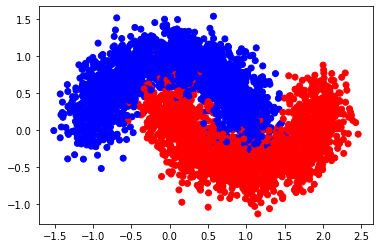

In [2]:
data = pd.read_csv('custom_dataset.csv', index_col=0)
data.dropna()

fig, ax = plt.subplots()
colors = []
for i in data['target'].to_numpy():
    if i == 0:
        colors.append('blue')
    else:
        colors.append('red')
ax.scatter(data['feature_1'].to_numpy(), data['feature_2'].to_numpy(), c = colors)

Примерно $y=-0.3*\sin(\pi*(x-0.5))+0.2$

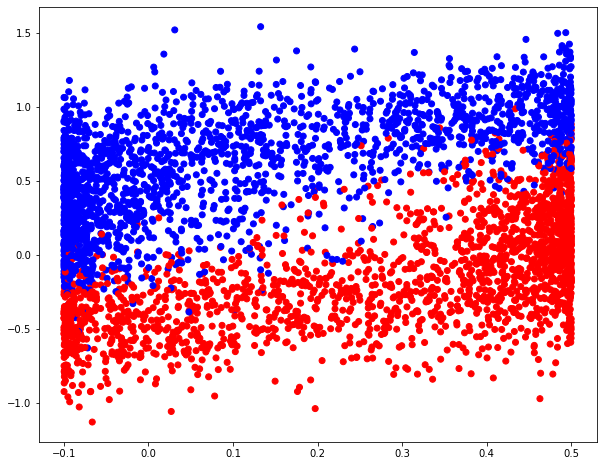

In [19]:
fig, ax = plt.subplots()
colors = []
for i in data['target'].to_numpy():
    if i == 0:
        colors.append('blue')
    else:
        colors.append('red')
ax.scatter(-0.3 * np.sin((data['feature_1'].to_numpy() - 0.5) * 3.1415) + 0.2, data['feature_2'].to_numpy(), c = colors)

Получилось что-то нормальное. Применяем SVC.

In [4]:
from sklearn.svm import SVC

In [20]:
X = np.stack((-0.5 * np.sin((data['feature_1'].to_numpy() - 0.5) * 3.1415), data['feature_2'].to_numpy()), axis=-1)
y = data['target'].to_numpy()

In [21]:
model = SVC(kernel='linear')
model.fit(X, y)

SVC(kernel='linear')

<ipython-input-22-8a9ed7b91c75>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap='autumn')


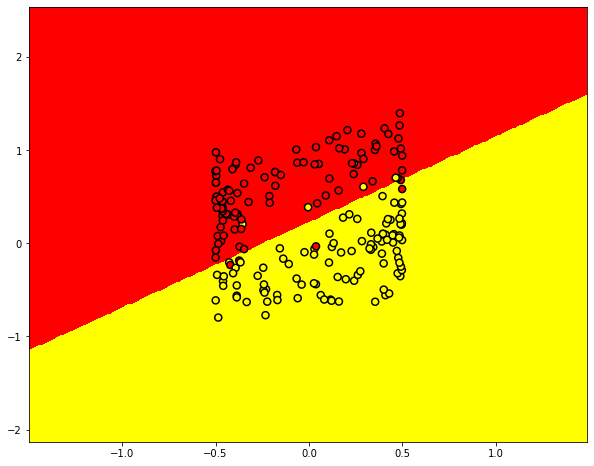

In [22]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

predicted = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

random_indxs = np.random.randint(0, X.shape[0], 200)

plt.rcParams['figure.figsize'] = (10,8)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[random_indxs, 0], X[random_indxs, 1], 
            c=y[random_indxs], s=50, cmap='autumn', edgecolors='black', linewidth=1.5)

In [9]:
from sklearn.model_selection import train_test_split

In [23]:
X_new = np.array(data[['feature_1', 'feature_2']])
y_new = np.array(data['target'])

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.33)

In [24]:
model_new = SVC(kernel='linear')
model_new.fit(X_train_new, y_train_new)

SVC(kernel='linear')

In [25]:
predicted = model_new.predict(X_test_new)
# Метрики качества
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
print(accuracy_score(y_test_new, predicted))
print(f1_score(y_test_new, predicted))
print(roc_auc_score(y_test_new, predicted))
print(precision_score(y_test_new, predicted))
print(recall_score(y_test_new, predicted))

0.8498520710059172
0.8481675392670157
0.8498965754998851
0.84375
0.8526315789473684


Считаем ширину разделяющей полосы.

In [26]:
#Коэффициенты разделяющей прямой
b = model_new.intercept_[0]
ws = model_new.coef_

#расстояние от прямой до точки (x, y)
def distance(x, y, ws_, b_):
    return (np.fabs(ws_[0][0] * x + ws_[0][1] * y + b_) / np.sqrt(np.sum(ws_**2)))

x = X_test_new[:, 0]
y = X_test_new[:, 1]

#Расстояние между плоскостями
r1 = np.min(distance(x[predicted == 0], y[predicted == 0], ws, b))
r2 = np.min(distance(x[predicted == 1], y[predicted == 1], ws, b))
print(r1 + r2)

0.0033993533417064794


Часть 2. kNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
X = np.stack((data['feature_1'].to_numpy(), data['feature_2'].to_numpy()), axis=-1)
y = data['target'].to_numpy()

In [16]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

<ipython-input-17-9dce8c18e334>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap='autumn')


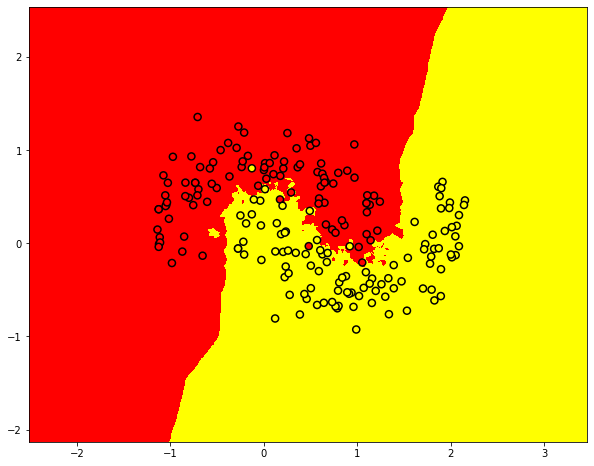

In [17]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

predicted = neigh.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

random_indxs = np.random.randint(0, X.shape[0], 200)

plt.rcParams['figure.figsize'] = (10,8)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[random_indxs, 0], X[random_indxs, 1], 
            c=y[random_indxs], s=50, cmap='autumn', edgecolors='black', linewidth=1.5)

In [18]:


neigh_new = KNeighborsClassifier(n_neighbors=5) # Для эксперимента попробуем 5
neigh_new.fit(X_train_new, y_train_new)

predicted_n = neigh_new.predict(X_test_new)

print(accuracy_score(y_test_new, predicted_n))
print(f1_score(y_test_new, predicted_n))
print(roc_auc_score(y_test_new, predicted_n))
print(precision_score(y_test_new, predicted_n))
print(recall_score(y_test_new, predicted_n))



0.9637573964497042
0.9613869188337273
0.9631060506340222
0.9728867623604466
0.9501557632398754
